In [1]:
!pip install stable-baselines3[extra]

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616828 sha256=9f744918feabcc7a932fd0d88efe787bd8ae51457347f1747a2e269f5cc3b9a4
  Stored in directory: c:\users\kannan\appdata\local\pip\cache\wheels\27\6d\b3\a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=446447 sha256=f9cf6fd3531261facb15dc5132c541009d809a176aec48475c5c87778caf3d93
  Stored in directory: c:\users\kannan\appdata\local\pip\cache\wheels\51\08\c5\28b973078691a3f8baf99fcaec1ed8f0e05ef6e54d2390212c
Successfully built gym AutoROM.accept-ro

# 1.Import Dependencies

In [2]:
import os 
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

In [6]:
!pip install pyglet

# 2.Load Environment

In [33]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

In [34]:
episodes = 5
for episode in range(1,episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action = env.action_space.sample()
    n_state,reward,done,info = env.step(action)
    score+=reward
  print('Episode:{} Score:{}'.format(episode,score))
env.close()

Episode:1 Score:13.0
Episode:2 Score:10.0
Episode:3 Score:15.0
Episode:4 Score:30.0
Episode:5 Score:28.0


In [14]:
env.reset()

array([ 0.00126179,  0.03153708, -0.02423511, -0.01331686], dtype=float32)

In [21]:
env.step(0)

(array([ 0.00382849, -0.35709456, -0.02626365,  0.5367603 ], dtype=float32),
 1.0,
 False,
 {})

# Understanding the environments
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [13]:
env.action_space
#here discrete values are 0 and 1....
# 0 means push cart to left
# 1 means push cart to right

Discrete(2)

In [17]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [19]:
env.observation_space.sample()
#The array elements include...[cartPosition,cartVelocity,POleAngle,Pole,AngularVelocity]

array([ 1.9954280e+00, -2.5179305e+38,  7.6511502e-02,  1.1943932e+37],
      dtype=float32)

# Algorithms

Model-free: only uses current state values to make prediction

Model-based: try to make a prediction abt the future state of the model to try to generate a best possible action
https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html

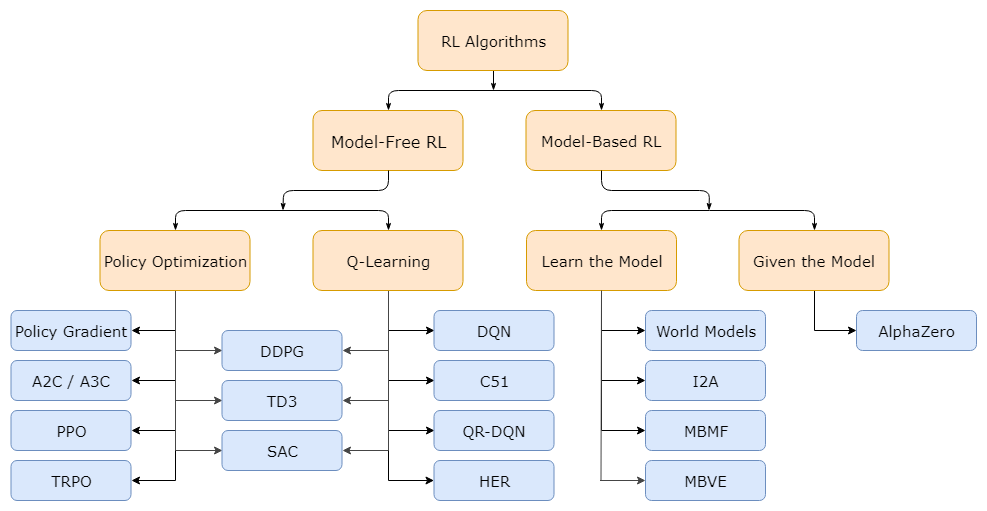

# available algos in stable baselines
HEre ticks are represented for action spaces not observation space

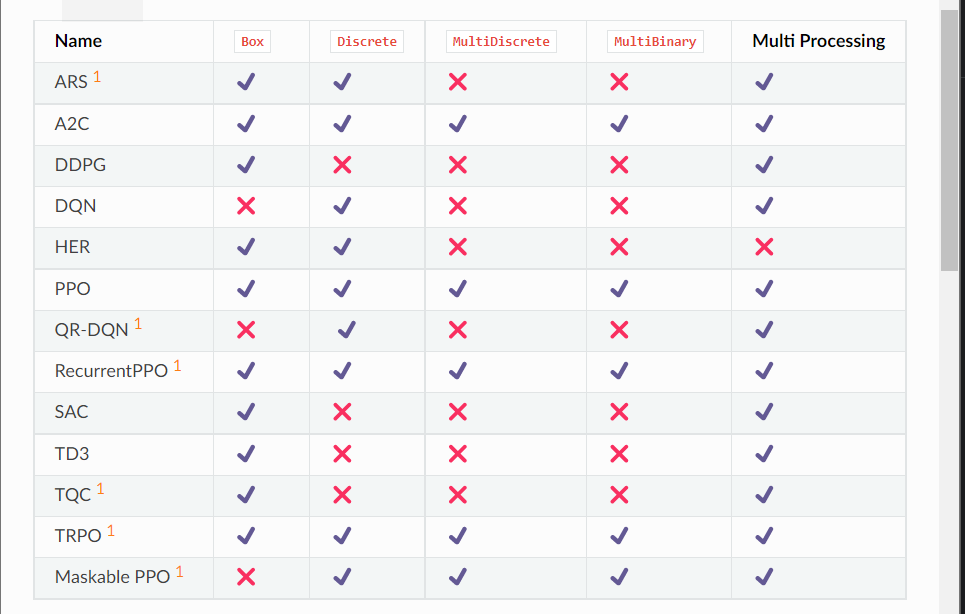

# 3.Train an RL Model

In [22]:
#Make your directories first
log_path = os.path.join('Training','Logs')

In [23]:
log_path

'Training\\Logs'

In [24]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda:env]) 
model = PPO('MlpPolicy',env,verbose=1,tensorboard_log=log_path)

Using cpu device


In [25]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 35   |
|    iterations      | 1    |
|    time_elapsed    | 57   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 67           |
|    iterations           | 2            |
|    time_elapsed         | 60           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0085773785 |
|    clip_fraction        | 0.117        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.00498      |
|    learning_rate        | 0.0003       |
|    loss                 | 9.4          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0203      |
|    value_loss           | 57.5         |
----------------------------

# 4.Save model

In [26]:
PPO_Path = os.path.join('Training','Saved Models','PPO_Model_CartPole')

In [27]:
model.save(PPO_Path)

# 5.Evaluation

In [28]:
evaluate_policy(model,env,n_eval_episodes=10,render=True)

C:\Users\kannan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

In [29]:
env.close()

# 6.Test Model

In [38]:
episodes = 5
for episode in range(1,episodes+1):
  obs = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action,_ = model.predict(obs)#model.predt return 2 things
    obs,reward,done,info = env.step(action)
    score+=reward
  print('Episode:{} Score:{}'.format(episode,score))
env.close()

Episode:1 Score:200.0
Episode:2 Score:200.0
Episode:3 Score:200.0
Episode:4 Score:200.0
Episode:5 Score:200.0


# Viewing logs in tensorboard

In [40]:
#go thru the video...it jz gives various metrics

# Adding a callback to the training stage

In [41]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [42]:
save_path = os.path.join('Training','Save Models')

In [43]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200,verbose=1)
eval_callback = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=10000,
                             best_model_save_path=save_path,
                             verbose=1)

In [44]:
model = PPO('MlpPolicy',env,verbose=1,tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [45]:
model.learn(total_timesteps=20000,callback=eval_callback)

Logging to Training\Logs\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.2     |
|    ep_rew_mean     | 20.2     |
| time/              |          |
|    fps             | 2380     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.1        |
|    ep_rew_mean          | 25.1        |
| time/                   |             |
|    fps                  | 1557        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009750229 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00228    |

C:\Users\kannan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=199.20 +/- 1.60
Episode length: 199.20 +/- 1.60
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 199         |
|    mean_reward          | 199         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.010226146 |
|    clip_fraction        | 0.0769      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.608      |
|    explained_variance   | 0.273       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.3        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 61.5        |
-----------------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 62.6     |
|    ep_rew_mean     | 62.6    

# Changing policies

In [46]:
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [47]:
model = PPO('MlpPolicy', env, verbose = 1, policy_kwargs={'net_arch': net_arch})

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [48]:
model.learn(total_timesteps=20000, callback=eval_callback)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | 22.5     |
| time/              |          |
|    fps             | 2005     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.1        |
|    ep_rew_mean          | 29.1        |
| time/                   |             |
|    fps                  | 1108        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014981955 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | -0.00896    |
|    learning_rate        | 0.

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 160      |
|    ep_rew_mean     | 160      |
| time/              |          |
|    fps             | 810      |
|    iterations      | 10       |
|    time_elapsed    | 25       |
|    total_timesteps | 20480    |
---------------------------------


# Using an alternate algo

In [49]:
from stable_baselines3 import DQN

In [50]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [51]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1223     |
|    time_elapsed     | 0        |
|    total_timesteps  | 93       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.6     |
|    ep_rew_mean      | 26.6     |
|    exploration_rate | 0.899    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1740     |
|    time_elapsed     | 0        |
|    total_timesteps  | 213      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.846    |
| time/               | 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 2203     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2023     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 2230     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2132     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 2250     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4002     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 2244     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4080     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 2342     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5934     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 2361     |
|    time_elapsed     | 2        |
|    total_timesteps  | 6064     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 2336     |
|    time_elapsed     | 3        |
|    total_timesteps  | 7757     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 2345     |
|    time_elapsed     | 3        |
|    total_timesteps  | 7859     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 21.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 2242     |
|    time_elapsed     | 4        |
|    total_timesteps  | 9692     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 2239     |
|    time_elapsed     | 4        |
|    total_timesteps  | 9762     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 18.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 2138     |
|    time_elapsed     | 5        |
|    total_timesteps  | 11330    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 2137     |
|    time_elapsed     | 5        |
|    total_timesteps  | 11391    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.1     |
|    ep_rew_mean      | 19.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 2201     |
|    time_elapsed     | 6        |
|    total_timesteps  | 13396    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 2202     |
|    time_elapsed     | 6        |
|    total_timesteps  | 13475    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 2241     |
|    time_elapsed     | 6        |
|    total_timesteps  | 15430    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 2238     |
|    time_elapsed     | 6        |
|    total_timesteps  | 15487    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 2245     |
|    time_elapsed     | 7        |
|    total_timesteps  | 17234    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 2245     |
|    time_elapsed     | 7        |
|    total_timesteps  | 17301    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 880      |
|    fps              | 2187     |
|    time_elapsed     | 8        |
|    total_timesteps  | 19009    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 2191     |
|    time_elapsed     | 8        |
|    total_timesteps  | 19138    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

In [54]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')
model.save(dqn_path)

In [55]:
model = DQN.load(dqn_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [56]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(128.7, 38.02906782975359)

In [60]:
env.close()